In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split, cross_val_score

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping

import warnings
warnings.filterwarnings('ignore')


In [23]:
df_train= pd.read_csv("data/train.csv").set_index('id')
df_test= pd.read_csv("data/test.csv").set_index('id')
df_subm = pd.read_csv("data/sample_submission.csv")

In [24]:
df_train.head()

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed,rainfall
id,,,,,,,,,,,,
0,1,1017.4,21.2,20.6,19.9,19.4,87.0,88.0,1.1,60.0,17.2,1
1,2,1019.5,16.2,16.9,15.8,15.4,95.0,91.0,0.0,50.0,21.9,1
2,3,1024.1,19.4,16.1,14.6,9.3,75.0,47.0,8.3,70.0,18.1,1
3,4,1013.4,18.1,17.8,16.9,16.8,95.0,95.0,0.0,60.0,35.6,1
4,5,1021.8,21.3,18.4,15.2,9.6,52.0,45.0,3.6,40.0,24.8,0


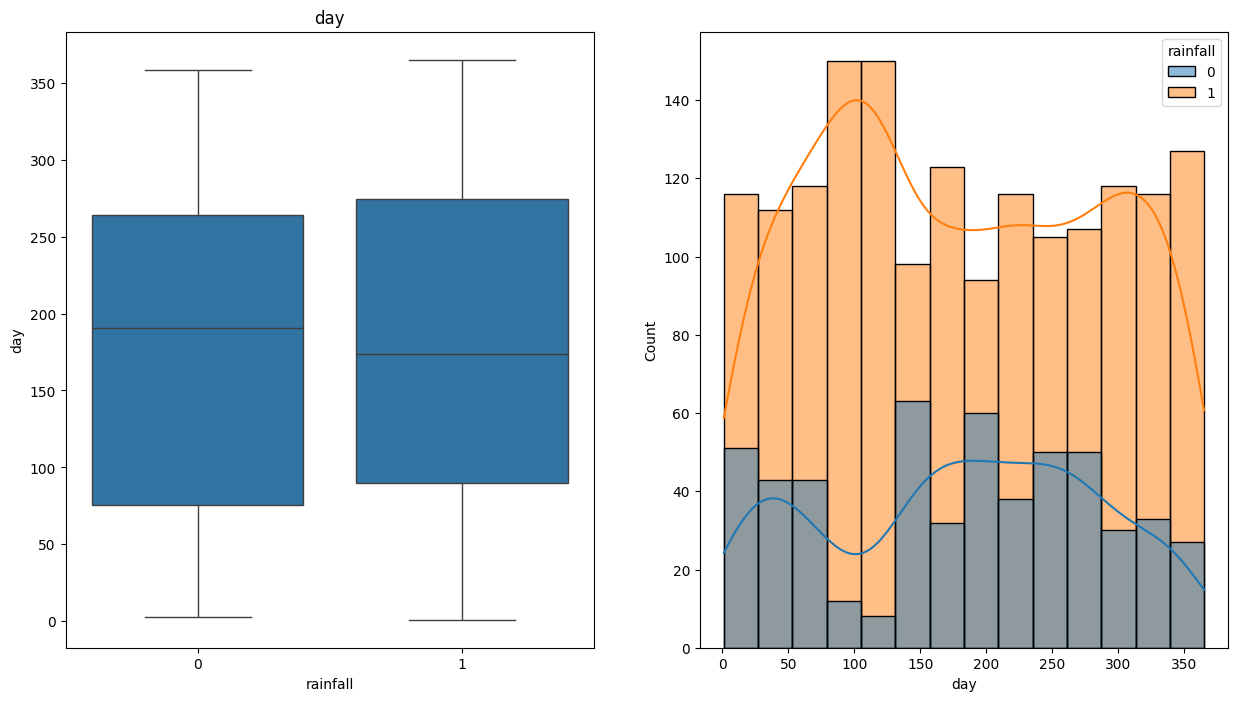

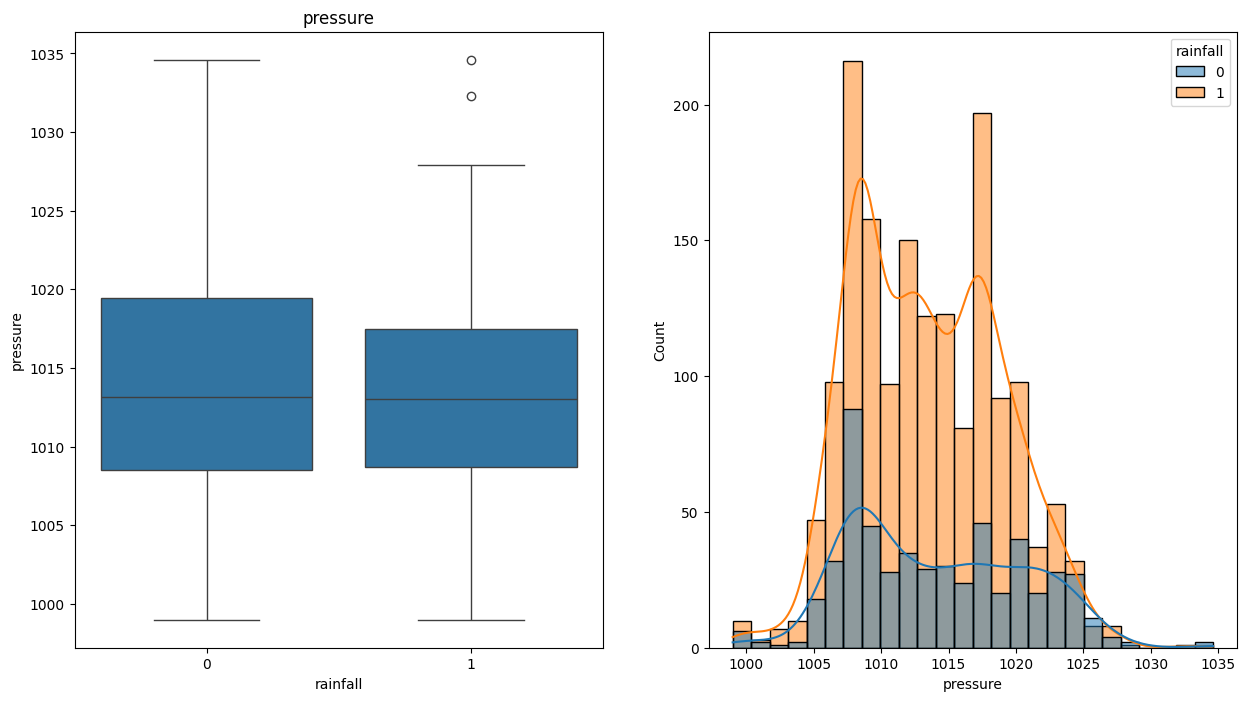

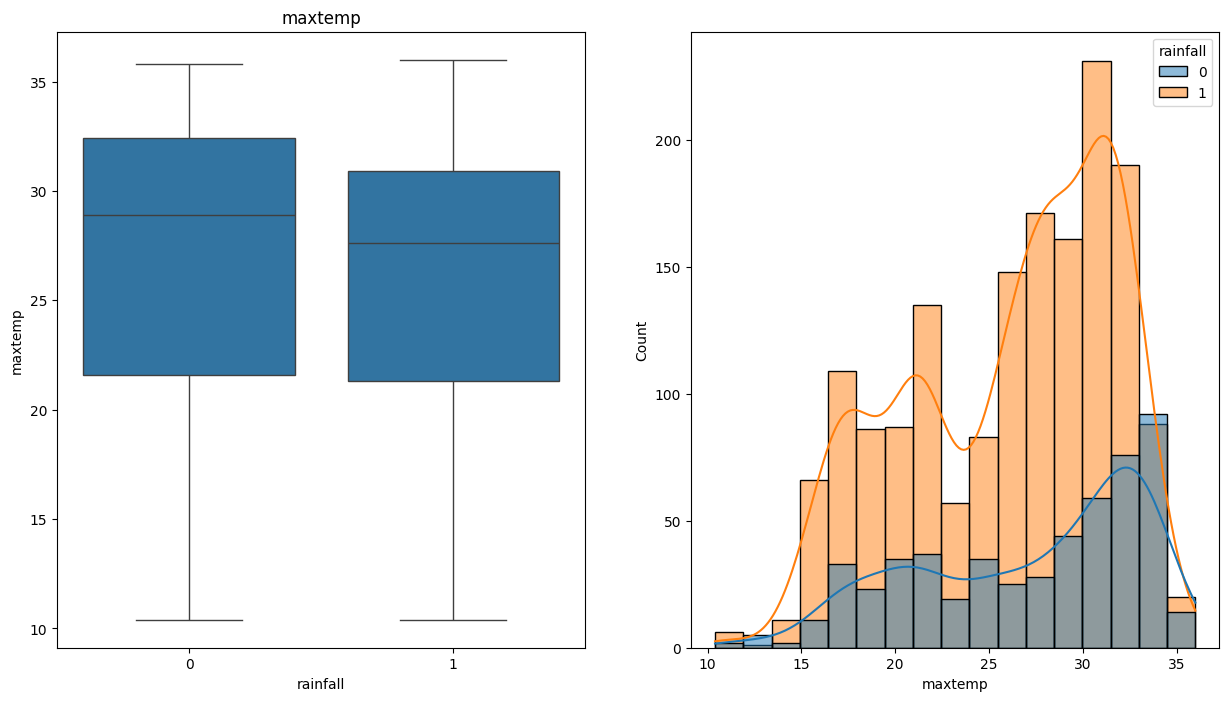

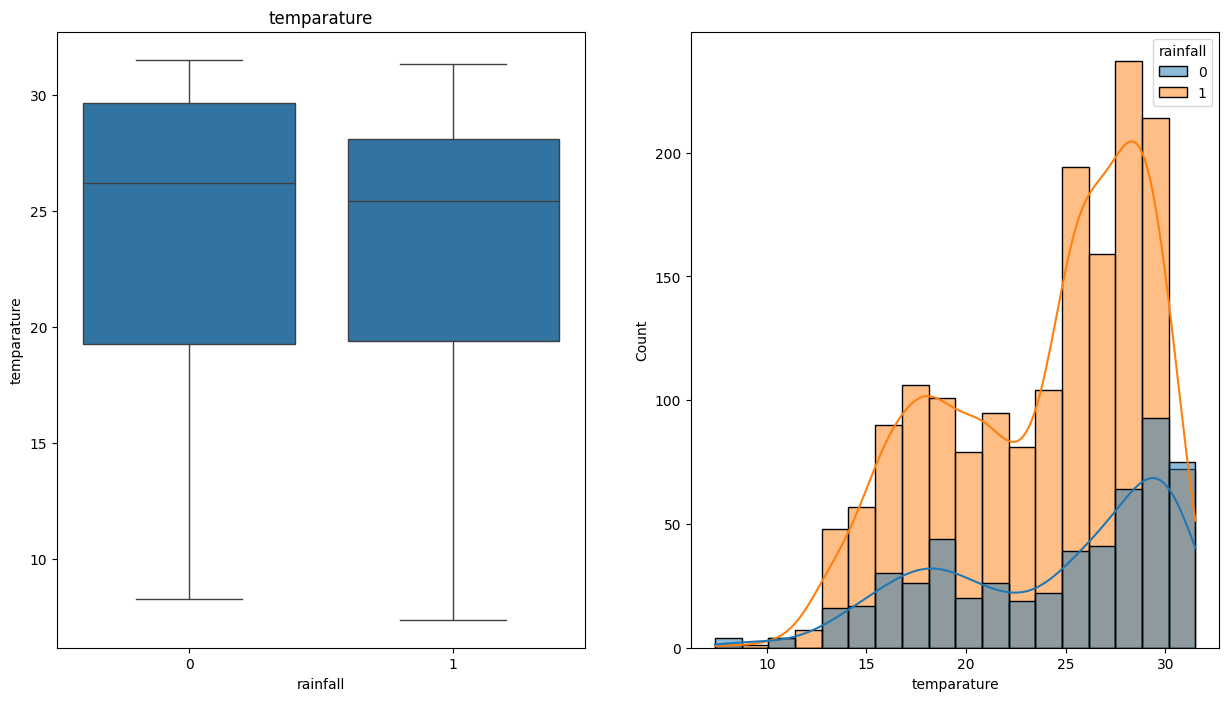

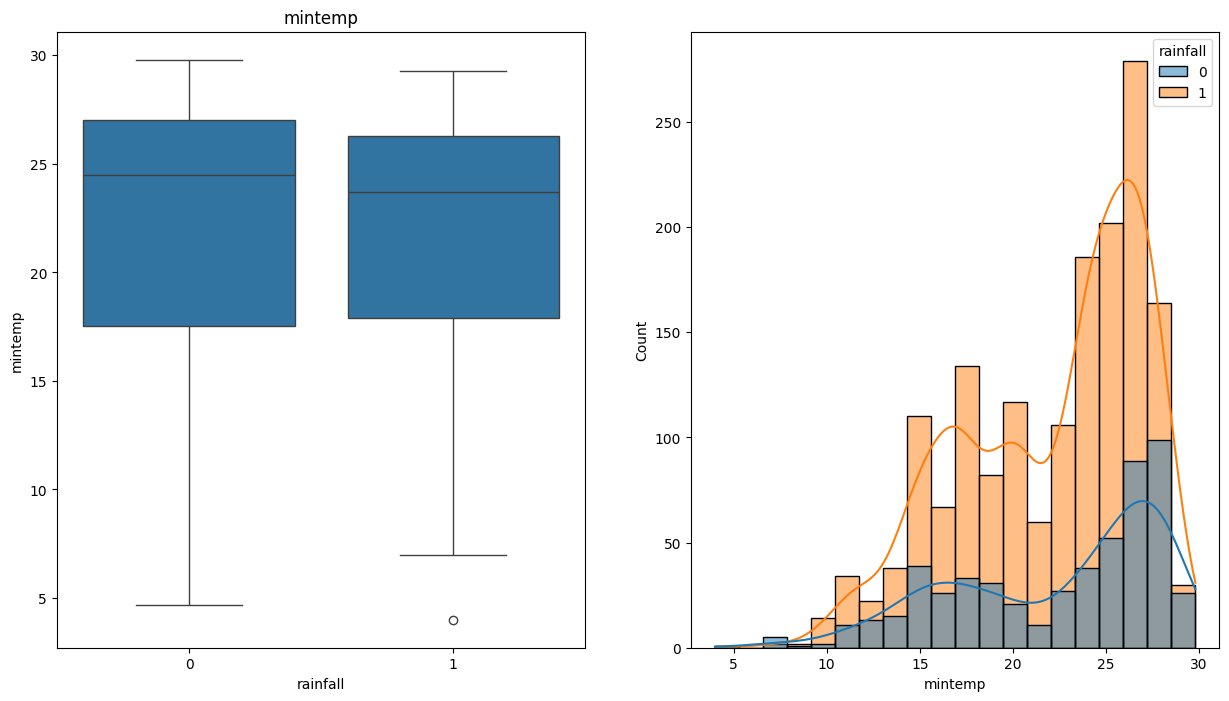

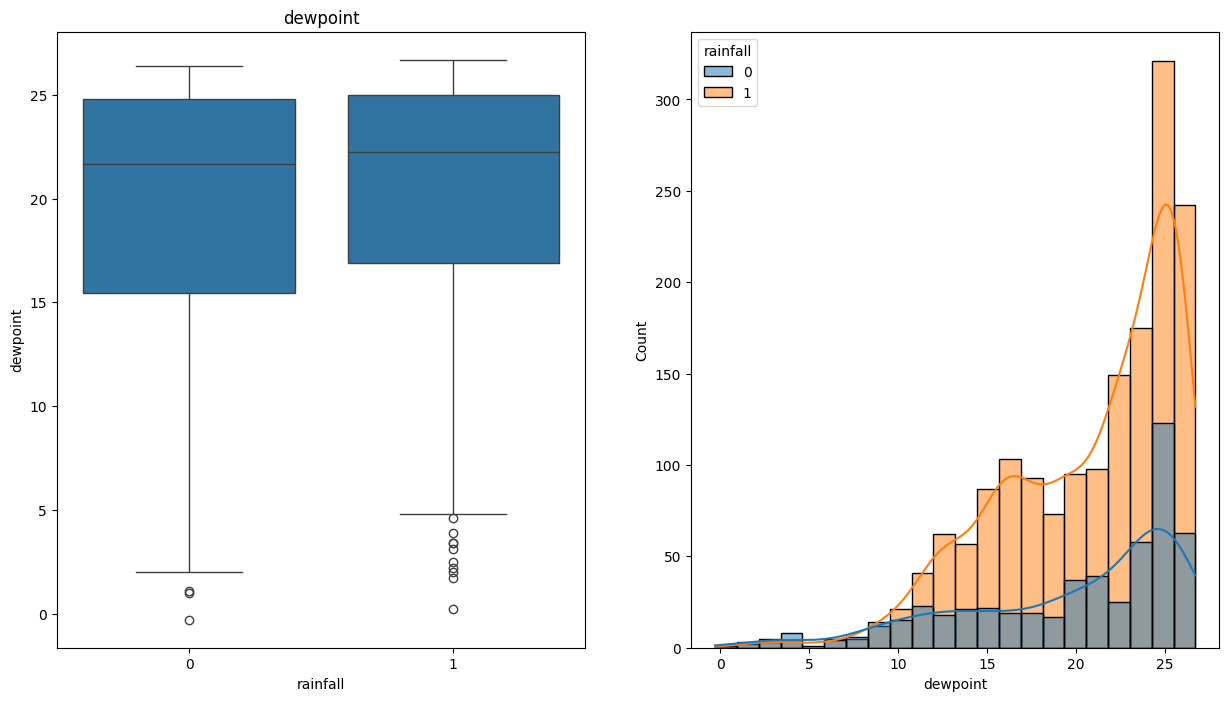

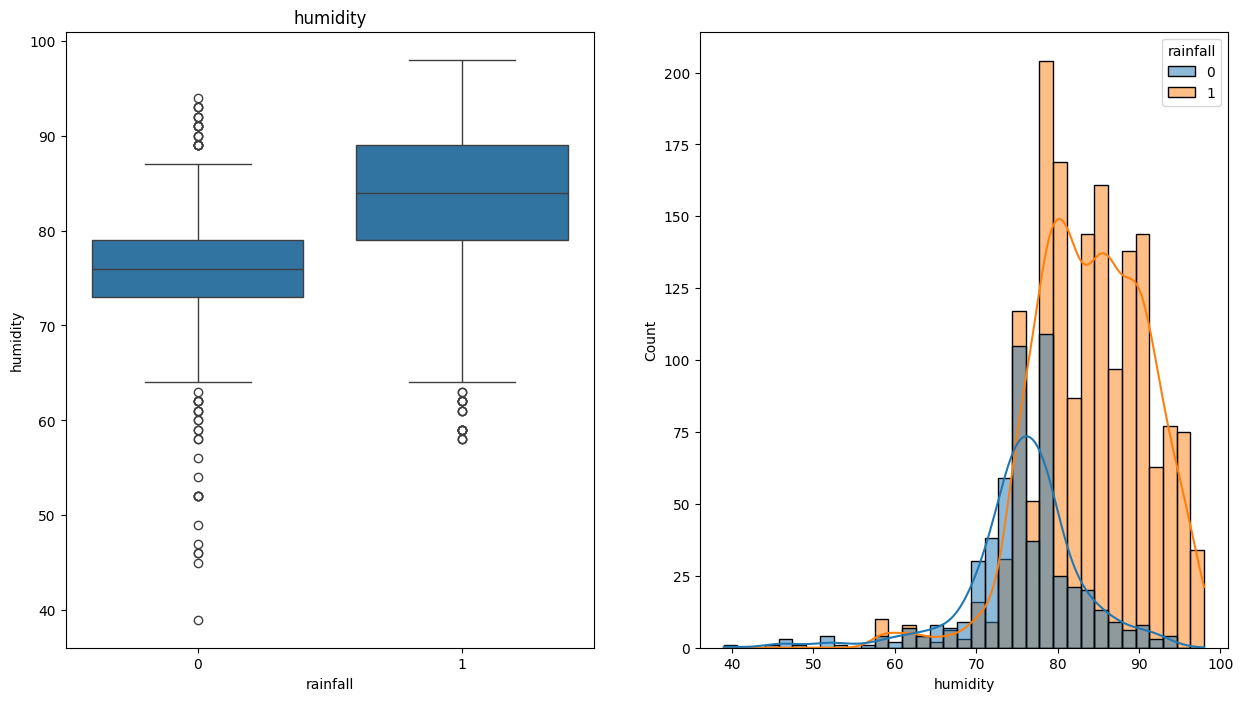

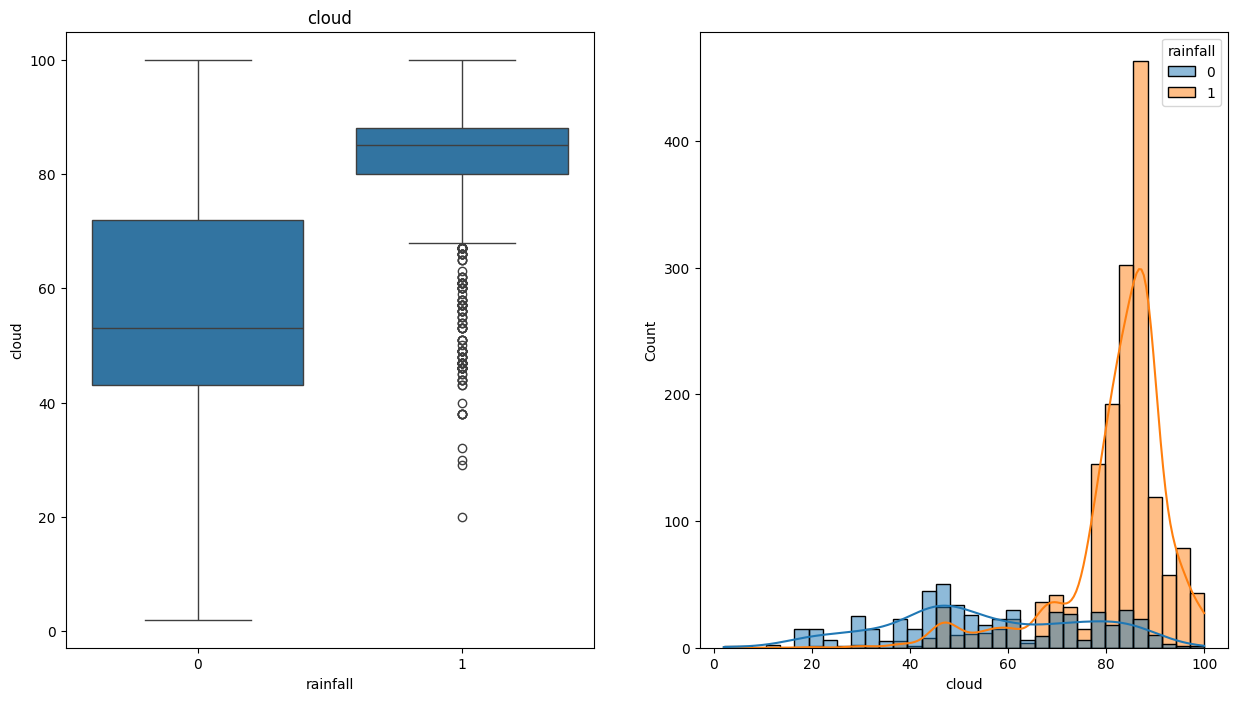

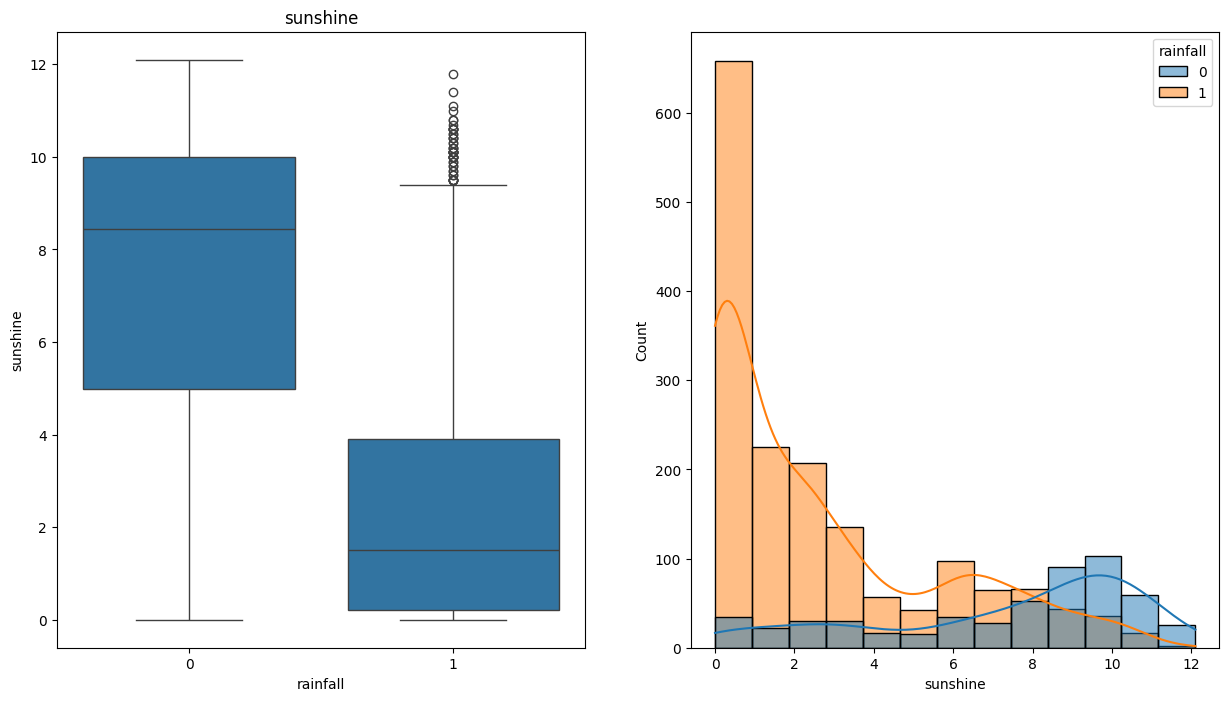

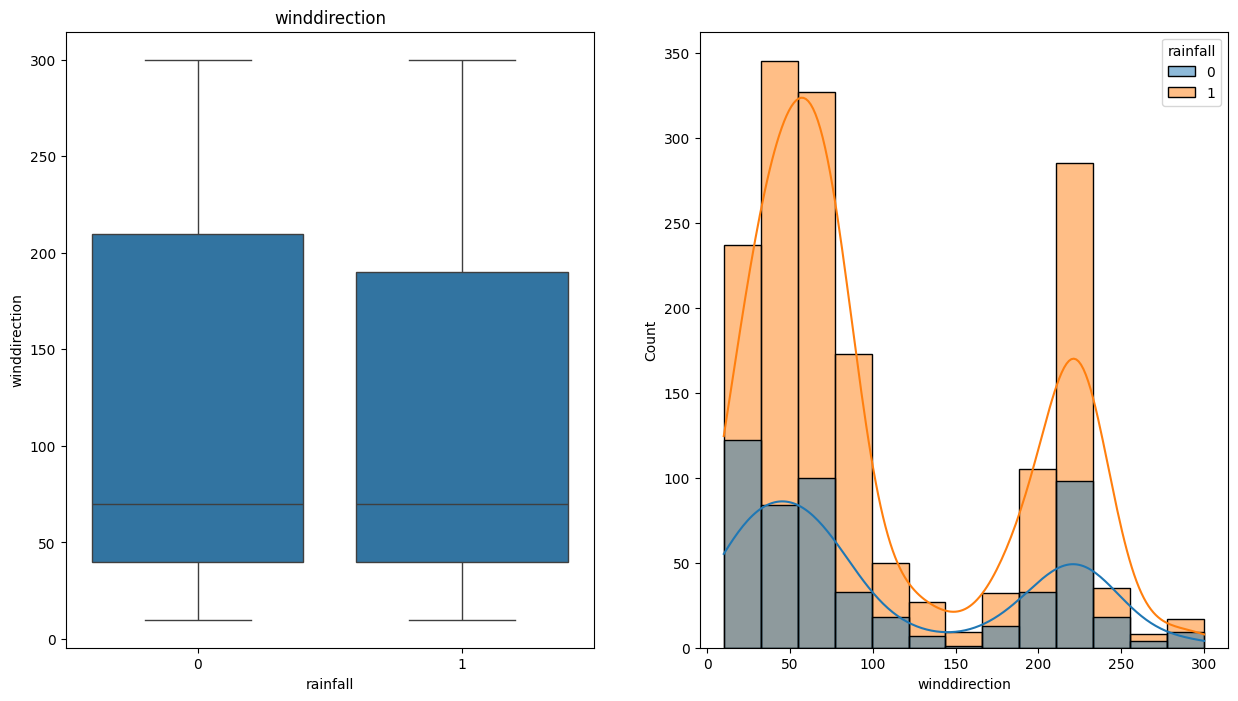

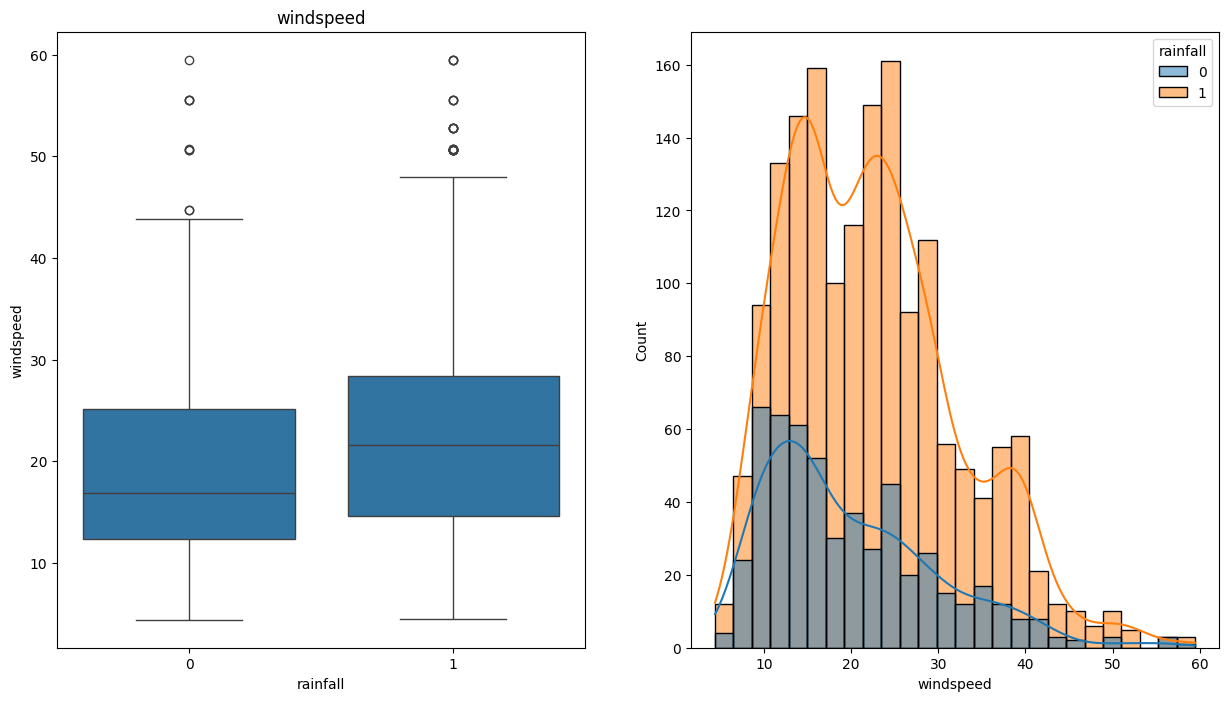

In [6]:
for col in df_train.columns[:-1]:
    plt.figure(figsize=(15, 8))
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df_train, y=col, x='rainfall')
    plt.title(col)
    plt.subplot(1, 2, 2)
    sns.histplot(data=df_train, x=col, hue='rainfall', kde=True)
    plt.show()

In [7]:
df_test['winddirection'].fillna(df_test['winddirection'].median(), inplace=True)

In [8]:
X = df_train.drop(['rainfall'], axis=1)
y = df_train['rainfall']

In [9]:
X_train = df_train.drop(columns=['day', 'rainfall'])
y_train = df_train['rainfall']
X_test = df_test.drop(columns=['day'])

In [11]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)

In [13]:
model = Sequential([
    Dense(128, activation='relu', kernel_initializer='he_normal', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(64, activation='relu', kernel_initializer='he_normal', input_shape=(X_train_scaled.shape[1],)),
    Dropout(0.3),
    Dense(32, activation='relu', kernel_initializer='he_normal'),
    Dropout(0.2),
    Dense(16, activation='relu', kernel_initializer='he_normal'),
    Dense(1, activation='sigmoid')  # Binary classification
])

In [14]:
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
history = model.fit(X_train_scaled, y_train, epochs=200, batch_size=32, validation_split=0.2, 
                    callbacks=[early_stopping], verbose=1)

Epoch 1/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 5s 22ms/step - accuracy: 0.6921 - loss: 0.6484 - val_accuracy: 0.8470 - val_loss: 0.3985
Epoch 2/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.8425 - loss: 0.4280 - val_accuracy: 0.8653 - val_loss: 0.3616
Epoch 3/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.8348 - loss: 0.4063 - val_accuracy: 0.8721 - val_loss: 0.3566
Epoch 4/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8421 - loss: 0.3797 - val_accuracy: 0.8744 - val_loss: 0.3441
Epoch 5/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8439 - loss: 0.3798 - val_accuracy: 0.8744 - val_loss: 0.3360
Epoch 6/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8454 - loss: 0.3845 - val_accuracy: 0.8630 - val_loss: 0.3464
Epoch 7/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.8674 - loss: 0.3409 - val_accuracy: 0.8584 - val_loss: 0.3455
Epoch 8/200
55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8422 - loss: 0.3892 - val_accuracy: 0.8630 - 

In [16]:
y_pred_keras = model.predict(X_test_scaled).flatten()

23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step  


In [19]:
# Save Submission
df_subm['rainfall'] = y_pred_keras
df_subm.to_csv('submission.csv', index=False)
df_subm.head()

,id,rainfall
0,2190,0.994004
1,2191,0.998211
2,2192,0.928360
3,2193,0.235796
4,2194,0.162783


In [25]:
df_test

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,sunshine,winddirection,windspeed
id,,,,,,,,,,,
2190,1,1019.5,17.5,15.8,12.7,14.9,96.0,99.0,0.0,50.0,24.3
2191,2,1016.5,17.5,16.5,15.8,15.1,97.0,99.0,0.0,50.0,35.3
2192,3,1023.9,11.2,10.4,9.4,8.9,86.0,96.0,0.0,40.0,16.9
2193,4,1022.9,20.6,17.3,15.2,9.5,75.0,45.0,7.1,20.0,50.6
2194,5,1022.2,16.1,13.8,6.4,4.3,68.0,49.0,9.2,20.0,19.4
...,...,...,...,...,...,...,...,...,...,...,...
2915,361,1020.8,18.2,17.6,16.1,13.7,96.0,95.0,0.0,20.0,34.3
2916,362,1011.7,23.2,18.1,16.0,16.0,78.0,80.0,1.6,40.0,25.2
2917,363,1022.7,21.0,18.5,17.0,15.5,92.0,96.0,0.0,50.0,21.9


In [26]:
df_subm

,id,rainfall
0,2190,0
1,2191,0
2,2192,0
3,2193,0
4,2194,0
...,...,...
725,2915,0
726,2916,0
727,2917,0
728,2918,0
